# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [2]:
library(tidyverse)
library(Rtsne)
library(ggplot2)
library(dplyr)
library(tibble)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [3]:
wine <- read_csv("wine.csv")
glimpse(wine)
wine %>% 
  select(where(is.numeric)) %>% 
  summary()

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 178
Columns: 14
$ Alcohol                        <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.2…
$ Malicacid                      <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.8…
$ Ash                            <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.4…
$ Alcalinity_of_ash              <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.…
$ Magnesium                      <dbl> 127, 100, 101, 113, 118, 112, 96, 121, …
$ Total_phenols                  <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.5…
$ Flavanoids                     <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.5…
$ Nonflavanoid_phenols           <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.3…
$ Proanthocyanins                <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.9…
$ Color_intensity                <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.2…
$ Hue                            <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.0…
$ `0D280_0D315_of_diluted_wines` <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.5…
$ Proline         

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [4]:
wine_scaled <- wine %>%
  mutate(across(-class, ~ as.numeric(scale(.x))))

# 2b) Some variables in the wine data are on a much larger scale than others. Since PCA looks at variance, 
# the big-range variables would dominate the analysis and hide the effect of smaller-range ones without scaling.
# Centering and scaling allows PCA to reflect real patterns in the data, not just differences
# in unites or magnitudes.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


[1] 0.3619885

[1] 0.1920749

[1] 0.5540634

# A tibble: 13 × 14
   variable         PC1      PC2     PC3     PC4     PC5     PC6     PC7     PC8
   <chr>          <dbl>    <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1 Alcohol     -0.144   -0.484   -0.207  -0.0179  0.266  -0.214  -0.0564 -0.396 
 2 Malicacid    0.245   -0.225    0.0890  0.537  -0.0352 -0.537   0.421  -0.0658
 3 Ash          0.00205 -0.316    0.626  -0.214   0.143  -0.154  -0.149   0.170 
 4 Alcalinity…  0.239    0.0106   0.612   0.0609 -0.0661  0.101  -0.287  -0.428 
 5 Magnesium   -0.142   -0.300    0.131  -0.352  -0.727  -0.0381  0.323   0.156 
 6 Total_phen… -0.395   -0.0650   0.146   0.198   0.149   0.0841 -0.0279  0.406 
 7 Flavanoids  -0.423    0.00336  0.151   0.152   0.109   0.0189 -0.0607  0.187 
 8 Nonflavano…  0.299   -0.0288   0.170  -0.203   0.501   0.259   0.595   0.233 
 9 Proanthocy… -0.313   -0.0393   0.149   0.399  -0.137   0.534   0.372  -0.368 
10 Color_inte…  0.0886  -0.530   -0.137   0.0659  0.0764  0.419  -0.228   0.0338
11 Hue  

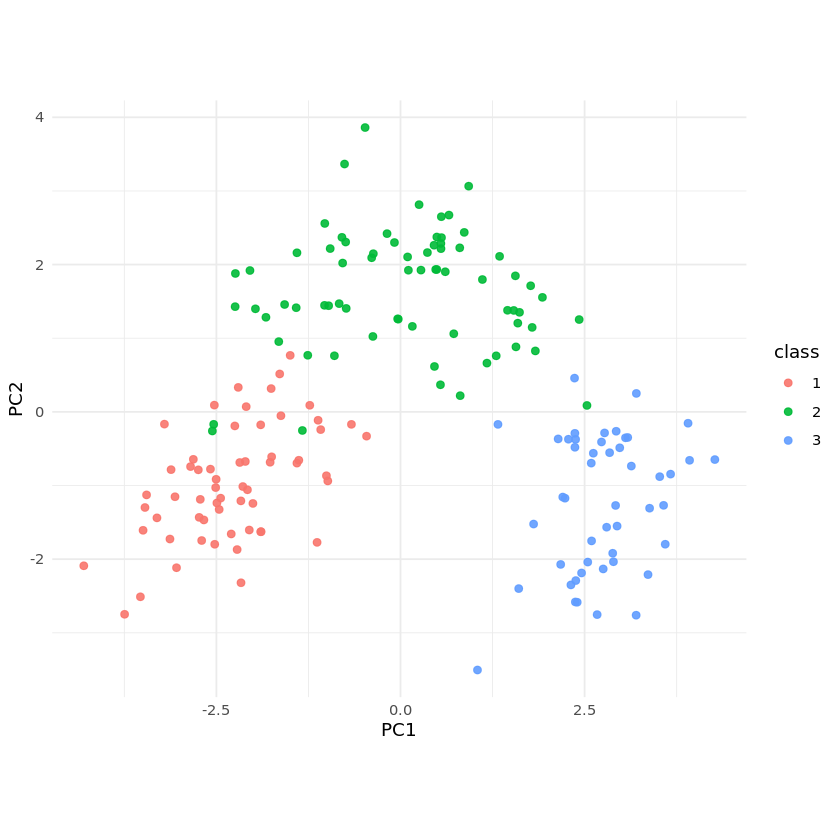

In [5]:
# a
X <- wine_scaled %>% select(-class)
pca_fit <- prcomp(X, center = FALSE, scale. = FALSE)

# b
ve <- (pca_fit$sdev^2) / sum(pca_fit$sdev^2)
ve[1]; ve[2]; sum(ve[1:2])

# c - To denoise and decorrelate, reduce to a compact set of informative dimensions, 
# and improve downstream methods.

# d - The rotation matrix is the loadings (weights of each original variable in each PC)
library(tibble)
rotation_tbl <- as_tibble(pca_fit$rotation, rownames = "variable")
print(rotation_tbl, n = Inf)

# e
scores12 <- as_tibble(pca_fit$x[, 1:2]) %>%
  setNames(c("PC1","PC2")) %>%
  mutate(class = factor(wine_scaled$class))
ggplot(scores12, aes(PC1, PC2, color = class)) +
  geom_point(size = 1.8, alpha = 0.9) +
  coord_equal() +
  theme_minimal()

# f - I see three partially separated clusters in PC1–PC2 space, that align with 3 wine classes. 
# The main variance directions capture chemistry differences that help differentiate wine classes (though there
# is some overlap).

# g - Data that is non-linear, like concentric circles/rings.

# h - A vector space is a flat, straight-line world. A manifold is a curved surface sitting inside a bigger space.
# t-SNE uses manifolds that linear PCA can miss, which is why we first reduced noise/size with PCA, then will 
# use t-SNE to reveal non-linear clustering.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


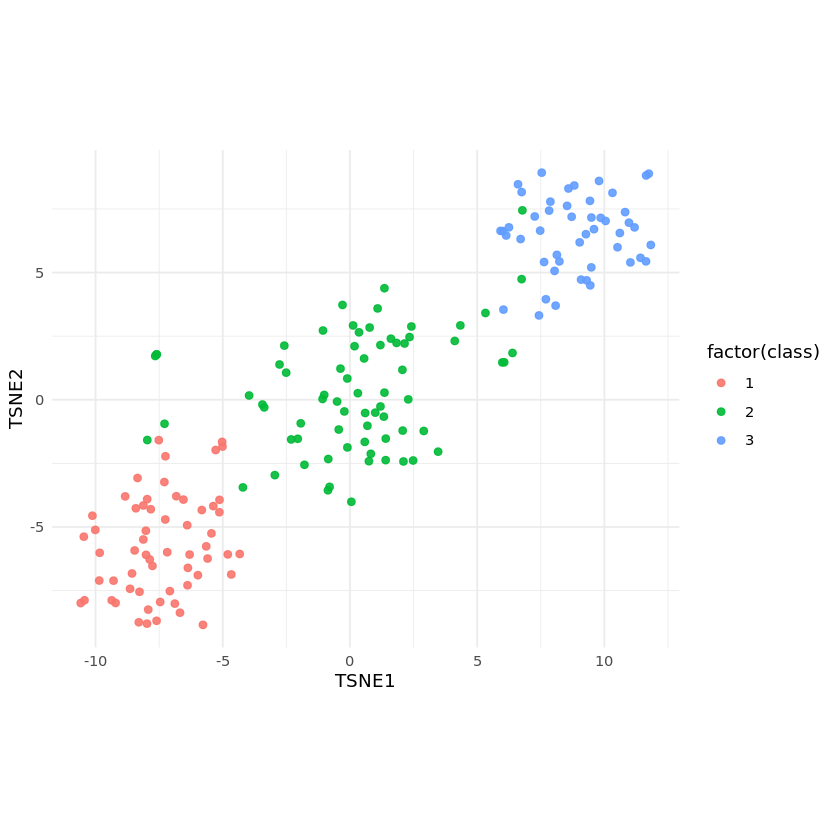

In [6]:
# a
set.seed(123)
pca10 <- as_tibble(pca_fit$x[, 1:10]) %>%
  mutate(class = factor(wine_scaled$class)) %>%
  distinct()  
tsne_fit <- Rtsne(
  as.matrix(select(pca10, -class)),
  dims = 2, perplexity = 30, verbose = FALSE,
  pca = FALSE, check_duplicates = TRUE
)
tsne_df <- as_tibble(tsne_fit$Y) %>%
  setNames(c("TSNE1", "TSNE2")) %>%
  mutate(class = pca10$class)

# b
ggplot(tsne_df, aes(TSNE1, TSNE2, color = factor(class))) +
  geom_point(size = 1.8, alpha = 0.9) +
  coord_equal() +
  theme_minimal()

# c - PCA is linear and preserves global variance; it can blur non-linear structure.
# t-SNE preserves local neighborhoods, revealing curved/non-linear clusters.Using PCs first 
# denoises and speeds up t-SNE

# d